In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from pathlib import Path
#%matplotlib qt

In [2]:
from scripts.my_camera_cal import find_points
from scripts.my_camera_cal import undistort

In [3]:
objpoints,imgpoints=find_points("../camera_cal/",9,5)

(720, 1280, 3)


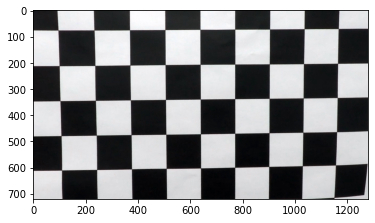

In [4]:
img = cv2.imread('../camera_cal/calibration1.jpg')
destino=undistort(img,objpoints,imgpoints)
print(destino.shape)
plt.imshow(destino)

In [12]:
def unwarp(undist,nx,ny):
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if(ret==True):
        dest2=undist.copy()
        cv2.drawChessboardCorners(dest2, (nx, ny), corners, ret)
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        #print(src)
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        #print(dst)
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(dest2, M, img_size)
        
    return warped,M

[[ 9.74729926e-01 -2.99354683e-02  7.19215741e+00]
 [ 2.65783620e-03  9.43063491e-01  2.58853175e+01]
 [-2.42445383e-05 -4.26295644e-05  1.00000000e+00]]


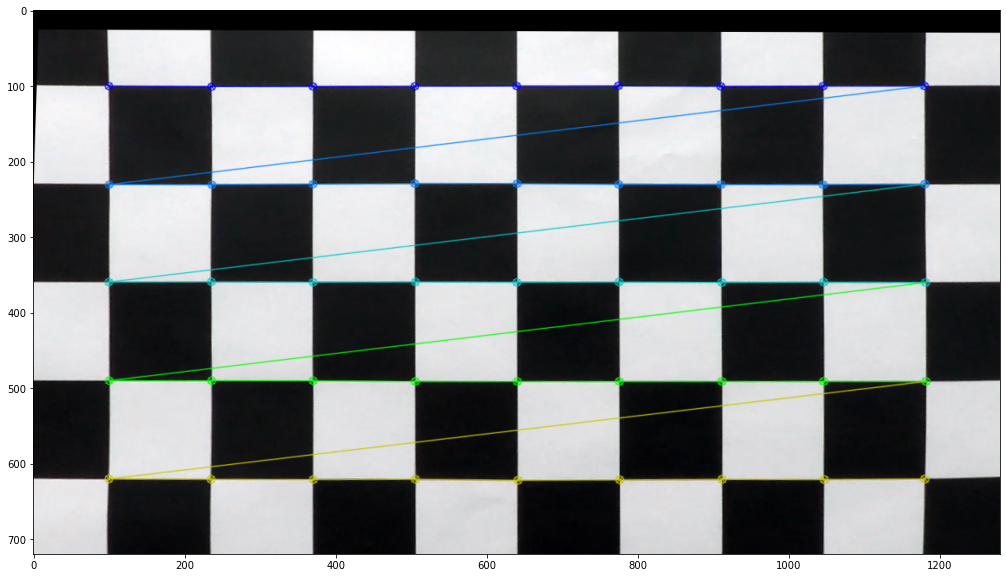

In [13]:
final,M=unwarp(destino,9,5)
print(M)
plt.figure(figsize=(20,10))
plt.imshow(final)
#plt.imshow(final,cmap="gray")

### Practica

In [ ]:
gray = cv2.cvtColor(destino, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, corners = cv2.findChessboardCorners(gray, (9, 5), None)

In [ ]:
cv2.drawChessboardCorners(destino, (9, 5), corners, ret)

In [ ]:
offset = 100 # offset for dst points
# Grab the image shape
img_size = (gray.shape[1], gray.shape[0])

In [ ]:
src = np.float32([corners[0], corners[9-1], corners[-1], corners[-9]])
print(src)

In [ ]:
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
print(dst)

In [ ]:
M = cv2.getPerspectiveTransform(src, dst)

In [ ]:
warped = cv2.warpPerspective(destino, M, img_size)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(warped)

In [ ]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(destino)
ax2.set_title('Undistorted Image', fontsize=30)

# Does not work (don't know why)

In [ ]:
def corners_unwarp(undist, nx, ny):
    # Use the OpenCV undistort() function to remove distortion
    #undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    else:
        print("what")

    # Return the resulting image and matrix
    return warped, M

In [ ]:
def unwarp(undist,nx,ny):
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if(ret==True):
        dest2=undist.copy()
        cv2.drawChessboardCorners(dest2, (nx, ny), corners, ret)
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        print(src)
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        print(dst)
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(dest2, M, img_size)
        
    return warped,ret,corners

In [ ]:
warped=corners_unwarp(destino, 9,5)


In [ ]:
print(type(warped)

In [ ]:
#plt.figure(figsize=(20,10))
plt.imshow(warped)